<a href="https://colab.research.google.com/github/WafaaMSawan/AI/blob/main/fake_reviews_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
import pandas as pd
data=pd.read_csv('/content/Restaurant_Reviews_data.tsv',sep='\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Exploring data

In [ ]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

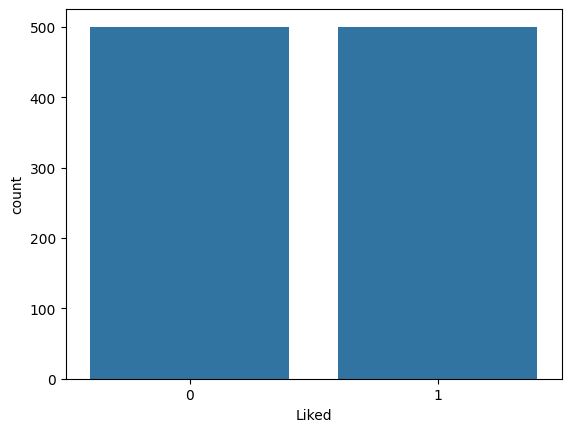

In [ ]:
import seaborn as sns
sns.countplot(x=data['Liked'])

In [ ]:
data["Review"].apply(len)

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [ ]:
data["Review letter count"]=data["Review"].apply(len)

In [ ]:
data

,Review,Liked,Review letter count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [ ]:
data.iloc[data["Review letter count"].idxmax()]

Review                 The problem I have is that they charge $11.99 ...
Liked                                                                  0
Review letter count                                                  149
Name: 985, dtype: object

In [ ]:
data.iloc[data["Review letter count"].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

# preprocessing Data

In [ ]:
s=data['Review']

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import re
#s=re.sub('[^a-zA-Z]'," ",s)
#s

In [ ]:
s=s.lower()
s

'                                wow    loved this place                                        crust is not good                 not tasty and the texture was just nasty         stopped by during the late may bank holiday of           the selection on the menu was great and so wer                                                                    i think food should have flavor and texture an                                    appetite instantly gone         overall i was not impressed and would not go b           the whole experience was underwhelming  and i            then  as if i hadn t wasted enough of my life     name  review  length        dtype  object'

In [ ]:
s=s.split()
s

['wow',
 'loved',
 'this',
 'place',
 'crust',
 'is',
 'not',
 'good',
 'not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty',
 'stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'of',
 'the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'wer',
 'i',
 'think',
 'food',
 'should',
 'have',
 'flavor',
 'and',
 'texture',
 'an',
 'appetite',
 'instantly',
 'gone',
 'overall',
 'i',
 'was',
 'not',
 'impressed',
 'and',
 'would',
 'not',
 'go',
 'b',
 'the',
 'whole',
 'experience',
 'was',
 'underwhelming',
 'and',
 'i',
 'then',
 'as',
 'if',
 'i',
 'hadn',
 't',
 'wasted',
 'enough',
 'of',
 'my',
 'life',
 'name',
 'review',
 'length',
 'dtype',
 'object']

In [ ]:
'''
temp=[]
for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)

temp
'''

"\ntemp=[]\nfor word in s:\n    if word not in stopwords.words('english'):\n        temp.append(word)\n        \ntemp\n"

In [ ]:
#s=' '.join(temp)
s

['wow',
 'loved',
 'this',
 'place',
 'crust',
 'is',
 'not',
 'good',
 'not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty',
 'stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'of',
 'the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'wer',
 'i',
 'think',
 'food',
 'should',
 'have',
 'flavor',
 'and',
 'texture',
 'an',
 'appetite',
 'instantly',
 'gone',
 'overall',
 'i',
 'was',
 'not',
 'impressed',
 'and',
 'would',
 'not',
 'go',
 'b',
 'the',
 'whole',
 'experience',
 'was',
 'underwhelming',
 'and',
 'i',
 'then',
 'as',
 'if',
 'i',
 'hadn',
 't',
 'wasted',
 'enough',
 'of',
 'my',
 'life',
 'name',
 'review',
 'length',
 'dtype',
 'object']

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps=PorterStemmer()

In [ ]:
s = ' '.join(s)
s = ps.stem(s)
print(s)

wow loved this place crust is not good not tasty and the texture was just nasty stopped by during the late may bank holiday of the selection on the menu was great and so wer i think food should have flavor and texture an appetite instantly gone overall i was not impressed and would not go b the whole experience was underwhelming and i then as if i hadn t wasted enough of my life name review length dtype object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()

In [ ]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#all in one

corpus=[]

for i in range(len(data)):
    s=re.sub('[^a-zA-Z]'," ",data['Review'][i])
    s=s.lower()
    s=s.split()
    s=[word for word in s if word not in stopwords.words('english')]
    s=' '.join(s)
    s=ps.stem(s)
    corpus.append(s)

corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [ ]:
cv.fit_transform(corpus).toarray().shape

(1000, 1994)

In [ ]:
x=cv.fit_transform(corpus).toarray()
y=data['Liked']

# spliting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.25,random_state=42)


# Model Training

## Naive bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf=MultinomialNB()

In [ ]:
clf.fit(x_train,y_train)

MultinomialNB()

# Model Prediction

In [ ]:
y_pre=clf.predict(x_test)
y_pre

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0])

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report

In [ ]:
print(accuracy_score(y_test,y_pre))

0.752


In [ ]:
print(confusion_matrix(y_test,y_pre))

[[90 38]
 [24 98]]


In [ ]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       128
           1       0.72      0.80      0.76       122

    accuracy                           0.75       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.75      0.75       250



## KNN Model

In [ ]:
from   sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pre_knn=knn.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pre_knn))

0.6


## Decision Tree Model

In [ ]:
from   sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pre_DT=DT.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pre_DT))

0.672


## RandomForest

In [ ]:
from   sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pre_RF=RF.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pre_RF))

0.7


## SVM

In [ ]:
from   sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
y_pre_sv=sv.predict(x_test)
print(accuracy_score(y_test,y_pre_sv))

0.712


## Logistic Regression

In [ ]:
from   sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pre_lr=lr.predict(x_test)
print(accuracy_score(y_test,y_pre_lr))

0.76
